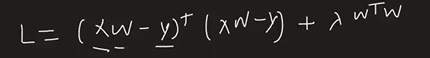

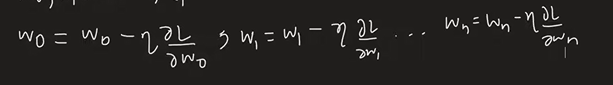

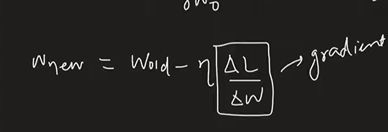

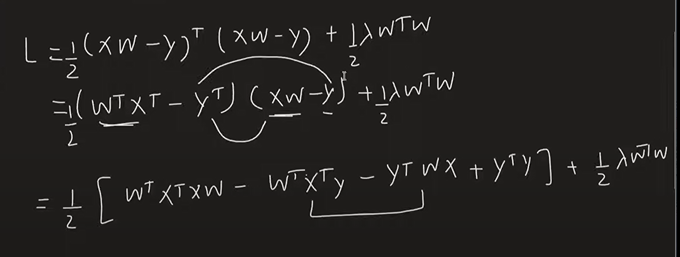

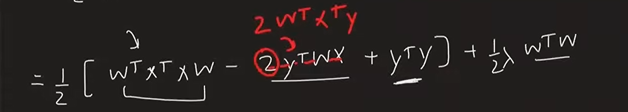
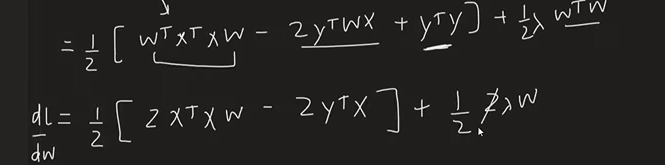

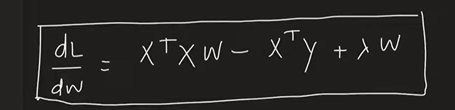
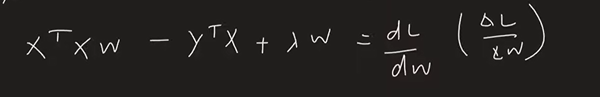

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [7]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4511929025542929
[  47.94028144 -138.20120606  351.82639366  259.96277363    1.08300491
  -48.77881634 -167.61353403  138.35349361  316.42027981  108.85740967]
[161.58999918]


In [8]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [9]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4625010162175073
[  34.52193778 -290.84082997  482.40183087  368.06788258 -852.44871283
  501.59162222  180.11114136  270.76336424  759.73536635   37.4913723 ]
151.1019852173411


In [10]:
class RidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [11]:
reg = RidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [12]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260913
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713463
